AIM:-**To predict the mortgage backed securities prepayment risk using ml models**
Mortgage backed securities:-
Firstly mortgage means people take loan from banks and banks issue them loans on thier credit profile,investments and certain proofs and they give those docs when loan tenure is finished.So these security papers are collected in a set and are sold to invesment banks and they are locked.now the investors gets profit from the intrests they pay.so if a customer pre pays the ammount investor might lose some profit.so we have to predict whether a customer will prepay or not.


CreditScore:-
FirstPaymentDate:-
FirstTimeHomebuyer:-
MaturityDate:-
MSA(marketing service agremment)-5digit
MIP-mortgage insurance percentage
Units
Occupancy
OCLTV-**ratio of all secured loans on a property to the total value of property**
DTI-**debit to income ratio**
OrigUPB-orginal unpaid balance
LTV
OrigInterestRate
Channel
PPM-prepayment penalty mortgage
ProductType
PropertyState
PropertyType
PostalCode
LoanSeqNum
LoanPurpose
OrigLoanTerm
NumBorrowers
SellerName
ServicerName
EverDelinquent
MonthsDelinquent
MonthsInRepayment

In [696]:
import pandas as pd
import numpy as np

In [697]:
loan_export=pd.read_csv("/content/LoanExport.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [698]:

pd.set_option("display.max_columns",None)

In [699]:
loan_export.head(50)

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,ProductType,PropertyState,PropertyType,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,117000,89,6.750,T,N,FRM,IL,SF,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,109000,73,6.500,R,N,FRM,CO,SF,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,88000,75,6.875,T,N,FRM,KS,SF,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,160000,76,6.875,R,N,FRM,CA,SF,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,109000,78,7.125,R,N,FRM,NJ,SF,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54
5,0,199902,N,202901,X,25,1,O,89,40,207000,89,7.125,T,N,FRM,CO,SF,80400,F199Q1224802,N,360,2,Ot,Other servicers,0,0,42
6,0,199902,N,202901,X,25,1,O,90,21,111000,90,6.875,T,N,FRM,WI,SF,53100,F199Q1291436,P,360,1,RE,Other servicers,0,0,44
7,0,199902,X,202901,36740,0,1,O,72,20,97000,72,6.750,R,N,FRM,FL,SF,32800,F199Q1001824,N,360,1,NO,WELLSFARGOBANKNA,1,3,145
8,0,199902,Y,202710,25540,30,1,O,95,38,55000,95,7.000,R,X,FRM,CT,SF,6400,F199Q1079744,P,345,1,Ot,Other servicers,0,0,64
9,0,199902,Y,202901,48620,30,1,O,95,27,35000,95,7.125,T,N,FRM,KS,SF,67000,F199Q1196318,P,360,1,Ot,WELLSFARGOBANKNA,1,104,212


In [700]:

 categoricalcolumns=[]
 numericalcolumns=[]
 for i in loan_export.columns:
   if loan_export[i].dtypes==object:
      categoricalcolumns.append(i)
   else:
      numericalcolumns.append(i)
      
  

In [701]:
categoricalcolumns

['FirstTimeHomebuyer',
 'MSA',
 'Occupancy',
 'Channel',
 'PPM',
 'ProductType',
 'PropertyState',
 'PropertyType',
 'PostalCode',
 'LoanSeqNum',
 'LoanPurpose',
 'NumBorrowers',
 'SellerName',
 'ServicerName']

In [702]:
loan_export.shape

(291451, 28)

In [703]:
loan_export.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

In [704]:
loan_export.FirstTimeHomebuyer.value_counts()

N    184154
X     78015
Y     29282
Name: FirstTimeHomebuyer, dtype: int64

In [705]:
def valuecounts(x):
    print(loan_export[x].value_counts())

In [706]:

pd.set_option("display.max_rows",None)

In [707]:
loan_export.describe(include="O")

,FirstTimeHomebuyer,MSA,Occupancy,Channel,PPM,ProductType,PropertyState,PropertyType,PostalCode,LoanSeqNum,LoanPurpose,NumBorrowers,SellerName,ServicerName
count,291451,291451,291451,291451,291451,291451,291451,291451,291451,291451,291451,291451,266457,291451
unique,3,392,3,4,3,1,53,7,1767,291451,3,3,20,20
top,N,X,O,T,N,FRM,CA,SF,94500,F199Q1268030,P,2,Ot,Other servicers
freq,184154,39100,276131,167670,282125,291451,43327,244923,2582,1,123404,187335,76943,64043



#As msa is market service agremment we can think this as whether it has been taken or not 
#if taken(yes or else no),so here we can Replace X With no and remaining all columns with yes

In [708]:

#As msa is market service agremment we can think this as whether it has been taken or not 
#if taken(yes or else no),so here we can Replace X With no and remaining all columns with yes
loan_export["MSA"]=loan_export["MSA"].replace(to_replace="X",value="No",regex=True)



  

In [709]:
loan_export["MSA"] = np.where(loan_export["MSA"].str.contains("No"), 1, 0)

In [710]:
loan_export["MSA"].value_counts()

0    252351
1     39100
Name: MSA, dtype: int64

first time home buyer can only be yes or no,but we are having a third one as X-which may be whether they are deciding to buy a home for first time.So,this might come under category of yes.As firsttime home buyer gets a extra benefit for down payment and it would lead investor learning more so i am categoresing it into yes category.

In [711]:
from numpy.core.fromnumeric import sort
valuecounts("FirstTimeHomebuyer")



N    184154
X     78015
Y     29282
Name: FirstTimeHomebuyer, dtype: int64


In [712]:
loan_export["FirstTimeHomebuyer"]=loan_export["FirstTimeHomebuyer"].replace(to_replace="X",value="Y",regex=True)

In [713]:
valuecounts("FirstTimeHomebuyer")

N    184154
Y    107297
Name: FirstTimeHomebuyer, dtype: int64


Occupancy type is important because it indicates to a lender the lengths to which a borrower will go before they give up making payments on their mortgage.

To understand this, imagine you own two properties, each with their own mortgage.

One property is your home, where your spouse or kids live, or where you spend most of your time. This is your principal residence. The other property is a duplex that you rent out. This is your investment property.

Now, imagine you faced a significant financial hardship, and you could only afford to keep making payments on one of your two mortgages.
0-own house(one-to-four unit family home)
S-secondary(vaccation home)
I-investmet house(most important)

In [714]:
valuecounts("Occupancy")

O    276131
I      8734
S      6586
Name: Occupancy, dtype: int64


In [715]:
loan_export["Occupancy"]=loan_export["Occupancy"].replace(to_replace=["O","I","S"],value=["Own","Secondary","INVESTED"],regex=True)

In [716]:
valuecounts("Occupancy")

Own          276131
Secondary      8734
INVESTED       6586
Name: Occupancy, dtype: int64


Channel

In [717]:
valuecounts("Channel")#Chattel Mortgage,Traditional Mortgage,Retail banking,CORRESPONDENT lender
loan_export["Channel"]=loan_export["Channel"].replace(to_replace=["T","R","C","B"],value=["Traditional Mortgage","Retail banking","Retail banking","Retail banking"],regex=True)


T    167670
R    123219
C       407
B       155
Name: Channel, dtype: int64


In [718]:
valuecounts("Channel")

Traditional Mortgage    167670
Retail banking          123781
Name: Channel, dtype: int64


PPM-prepayment penalty mortgage
Prepayment penalties are written into mortgage contracts by lenders to compensate for prepayment risk, particularly in difficult economic climates and under circumstances where the incentive for a borrower to refinance a subprime mortgage is high. These penalties don’t only kick in when a borrower pays off the entire loan. Some penalty provisions go into effect if the borrower pays a large portion of the loan balance in a single payment.

In [719]:
valuecounts("PPM")

N    282125
X      5405
Y      3921
Name: PPM, dtype: int64


In [720]:
import seaborn as sns

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


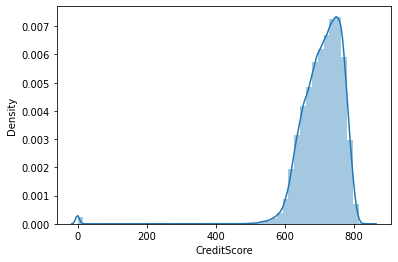

In [721]:
sns.distplot(loan_export["CreditScore"])

In [722]:
loan_export.describe()

,CreditScore,FirstPaymentDate,MaturityDate,MSA,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000
mean,708.936991,199904.760553,202902.367043,0.134156,9.216685,1.026022,76.960529,30.033453,124940.387921,76.937986,6.926547,359.835375,0.197848,1.837729,60.805291
std,68.408791,13.821228,16.090508,0.340821,12.648273,0.202986,15.236154,13.203974,53657.440624,15.225298,0.343541,2.286939,0.398378,8.809392,46.142599
min,0.000000,199901.000000,202402.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,0.000000,4.000000,301.000000,0.000000,0.000000,1.000000
25%,675.000000,199903.000000,202902.000000,0.000000,0.000000,1.000000,70.000000,22.000000,83000.000000,70.000000,6.750000,360.000000,0.000000,0.000000,34.000000
50%,717.000000,199904.000000,202903.000000,0.000000,0.000000,1.000000,80.000000,31.000000,117000.000000,80.000000,6.875000,360.000000,0.000000,0.000000,48.000000
75%,753.000000,199905.000000,202904.000000,0.000000,25.000000,1.000000,90.000000,39.000000,160000.000000,90.000000,7.125000,360.000000,0.000000,0.000000,63.000000
max,849.000000,201303.000000,204302.000000,1.000000,55.000000,4.000000,110.000000,65.000000,497000.000000,103.000000,12.350000,361.000000,1.000000,180.000000,212.000000


In [723]:
valuecounts('LoanPurpose')

P    123404
N    110036
C     58011
Name: LoanPurpose, dtype: int64


In [724]:
valuecounts('NumBorrowers')

2     187335
1     103777
X        339
Name: NumBorrowers, dtype: int64


In [725]:
numericalcolumns

['CreditScore',
 'FirstPaymentDate',
 'MaturityDate',
 'MIP',
 'Units',
 'OCLTV',
 'DTI',
 'OrigUPB',
 'LTV',
 'OrigInterestRate',
 'OrigLoanTerm',
 'EverDelinquent',
 'MonthsDelinquent',
 'MonthsInRepayment']

 'ProductType',
 'PropertyState',
 'PropertyType',
 'PostalCode',
 'LoanSeqNum',
 'LoanPurpose',
 'NumBorrowers',
 'SellerName',
 'ServicerName'

In [726]:
loan_export2=loan_export.drop(['ProductType', 'PropertyState', 'PropertyType', 'PostalCode', 'LoanSeqNum', 'SellerName', 'ServicerName',"MSA", 'FirstPaymentDate','MaturityDate','LTV','Channel'],axis=1)

In [727]:
loan_export2.columns

Index(['CreditScore', 'FirstTimeHomebuyer', 'MIP', 'Units', 'Occupancy',
       'OCLTV', 'DTI', 'OrigUPB', 'OrigInterestRate', 'PPM', 'LoanPurpose',
       'OrigLoanTerm', 'NumBorrowers', 'EverDelinquent', 'MonthsDelinquent',
       'MonthsInRepayment'],
      dtype='object')

In [728]:
loan_export2["OrigUPB"].describe()

count    291451.000000
mean     124940.387921
std       53657.440624
min        8000.000000
25%       83000.000000
50%      117000.000000
75%      160000.000000
max      497000.000000
Name: OrigUPB, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


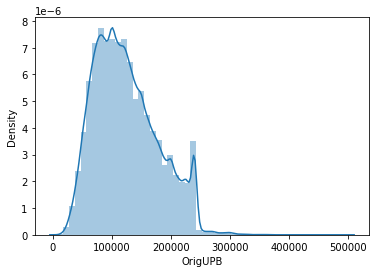

In [729]:
sns.distplot(loan_export2["OrigUPB"])

In [730]:
loan_export2["OrigUPB"].head(15)

0     117000
1     109000
2      88000
3     160000
4     109000
5     207000
6     111000
7      97000
8      55000
9      35000
10    126000
11    200000
12     70000
13     93000
14     79000
Name: OrigUPB, dtype: int64

In [731]:
loan_export2["OrigUPB"]=loan_export2["OrigUPB"].replace({0:117000})

In [732]:
loan_export2["OrigUPB"].describe()

count    291451.000000
mean     124940.387921
std       53657.440624
min        8000.000000
25%       83000.000000
50%      117000.000000
75%      160000.000000
max      497000.000000
Name: OrigUPB, dtype: float64

In [733]:
#creditscore

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


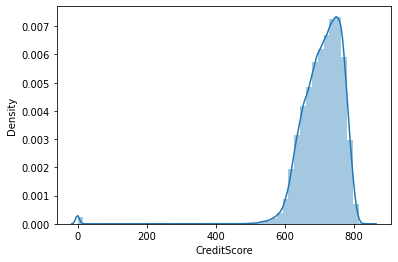

In [734]:
sns.distplot(loan_export2["CreditScore"])

In [735]:
loan_export2["CreditScore"].describe()

count    291451.000000
mean        708.936991
std          68.408791
min           0.000000
25%         675.000000
50%         717.000000
75%         753.000000
max         849.000000
Name: CreditScore, dtype: float64

In [736]:

loan_export2['CreditScore'] =loan_export2['CreditScore'].replace({0:710})#average of all credit scores


In [737]:
loan_export2.CreditScore.describe()
bins=[300,600,700,760,850,900]
groups=['verypoor','poor','fair','good','exceptional']
loan_export2["CreditScore_ranges"] = pd.cut(loan_export2["CreditScore"],bins=bins,labels=groups)
loan_export2[["CreditScore_ranges","CreditScore"]].head()

,CreditScore_ranges,CreditScore
0,fair,710
1,fair,710
2,fair,710
3,fair,710
4,fair,710


In [738]:
loan_export2['CreditScore_ranges'].describe()

count     291451
unique         4
top         fair
freq      121548
Name: CreditScore_ranges, dtype: object

In [739]:
loan_export2=loan_export2.drop(["CreditScore"],axis=1)

In [740]:
loan_export2.columns

Index(['FirstTimeHomebuyer', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI',
       'OrigUPB', 'OrigInterestRate', 'PPM', 'LoanPurpose', 'OrigLoanTerm',
       'NumBorrowers', 'EverDelinquent', 'MonthsDelinquent',
       'MonthsInRepayment', 'CreditScore_ranges'],
      dtype='object')

In [741]:
#mip

In [742]:
loan_export2["MIP"].describe()

count    291451.000000
mean          9.216685
std          12.648273
min           0.000000
25%           0.000000
50%           0.000000
75%          25.000000
max          55.000000
Name: MIP, dtype: float64

In [743]:
loan_export2["MIP"]=loan_export2["MIP"].replace({0:9.216685})

In [744]:
#'Units'

In [745]:
loan_export2["Units"].describe()

count    291451.000000
mean          1.026022
std           0.202986
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           4.000000
Name: Units, dtype: float64

In [746]:
#'OCLTV'

In [747]:
loan_export2['OCLTV'].describe()

count    291451.000000
mean         76.960529
std          15.236154
min           0.000000
25%          70.000000
50%          80.000000
75%          90.000000
max         110.000000
Name: OCLTV, dtype: float64

In [748]:
loan_export2["OCLTV"]=loan_export2["OCLTV"].replace({0:77})

In [749]:
bins=[0,80,110]
groups=['goodltv','badltv']
loan_export2["ltv_ranges"] = pd.cut(loan_export2["OCLTV"],bins=bins,labels=groups)
loan_export2[["ltv_ranges","OCLTV"]].head()

,ltv_ranges,OCLTV
0,badltv,89
1,goodltv,73
2,goodltv,75
3,goodltv,76
4,goodltv,78


In [750]:
#DTI

In [751]:
loan_export2["DTI"].describe()

count    291451.000000
mean         30.033453
std          13.203974
min           0.000000
25%          22.000000
50%          31.000000
75%          39.000000
max          65.000000
Name: DTI, dtype: float64

In [752]:
loan_export2["DTI"]=loan_export2["DTI"].fillna(0)

In [753]:
loan_export2["DTI"]=loan_export2["DTI"].replace({0:30})

In [754]:
Bins=[0,10,15,20,30]
Groups=['lowrisk','mediumrisk','risk','Highrisk']
loan_export2["DTI_ranges"] = pd.cut(loan_export2["DTI"],bins=Bins,labels=Groups)
loan_export2[["DTI_ranges","DTI"]].head()

,DTI_ranges,DTI
0,Highrisk,27
1,risk,17
2,risk,16
3,mediumrisk,14
4,risk,18


In [755]:
loan_export2=loan_export2.drop(["DTI","OCLTV"],axis=1)

In [756]:
loan_export2.columns

Index(['FirstTimeHomebuyer', 'MIP', 'Units', 'Occupancy', 'OrigUPB',
       'OrigInterestRate', 'PPM', 'LoanPurpose', 'OrigLoanTerm',
       'NumBorrowers', 'EverDelinquent', 'MonthsDelinquent',
       'MonthsInRepayment', 'CreditScore_ranges', 'ltv_ranges', 'DTI_ranges'],
      dtype='object')

In [757]:
#OrigInterestRate

In [758]:
loan_export2["OrigInterestRate"].describe()

count    291451.000000
mean          6.926547
std           0.343541
min           4.000000
25%           6.750000
50%           6.875000
75%           7.125000
max          12.350000
Name: OrigInterestRate, dtype: float64

In [759]:
#'NumBorrowers'

In [760]:
loan_export2['NumBorrowers'].describe()

count     291451
unique         3
top            2
freq      187335
Name: NumBorrowers, dtype: object

In [761]:
#'EverDelinquent', 'MonthsDelinquent',
  #     'MonthsInRepayment'

In [762]:
loan_export2['EverDelinquent'].describe()

count    291451.000000
mean          0.197848
std           0.398378
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: EverDelinquent, dtype: float64

In [763]:
loan_export2['MonthsDelinquent'].describe()

count    291451.000000
mean          1.837729
std           8.809392
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         180.000000
Name: MonthsDelinquent, dtype: float64

In [764]:
loan_export2['MonthsInRepayment'].describe()

count    291451.000000
mean         60.805291
std          46.142599
min           1.000000
25%          34.000000
50%          48.000000
75%          63.000000
max         212.000000
Name: MonthsInRepayment, dtype: float64

In [765]:
loan_export2["CreditScore_ranges"]=loan_export2["CreditScore_ranges"].astype("str")
loan_export2["ltv_ranges"]=loan_export2["ltv_ranges"].astype("str")
loan_export2["DTI_ranges"]=loan_export2["DTI_ranges"].astype("str")


In [766]:
loan_export2.dtypes

FirstTimeHomebuyer     object
MIP                   float64
Units                   int64
Occupancy              object
OrigUPB                 int64
OrigInterestRate      float64
PPM                    object
LoanPurpose            object
OrigLoanTerm            int64
NumBorrowers           object
EverDelinquent          int64
MonthsDelinquent        int64
MonthsInRepayment       int64
CreditScore_ranges     object
ltv_ranges             object
DTI_ranges             object
dtype: object

In [767]:
#univariate bivariate analysis

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


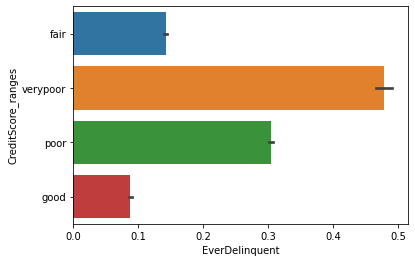

In [768]:
sns.barplot(loan_export2["EverDelinquent"],loan_export2["CreditScore_ranges"])

people having very poor and poor credit scores are the persons who delay the most and are deliquent.


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


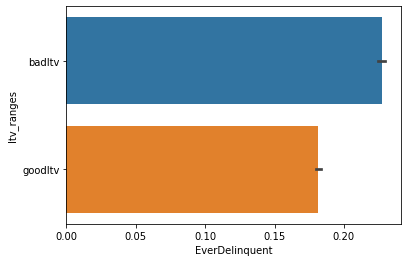

In [769]:
sns.barplot(loan_export2["EverDelinquent"],loan_export2["ltv_ranges"])

#from this we can say that the person having ltv greater than 80 is surely having more deliquency.


In [770]:
loan_export2["DTI_ranges"]=loan_export2["DTI_ranges"].replace({"nan":"Highrisk"})

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


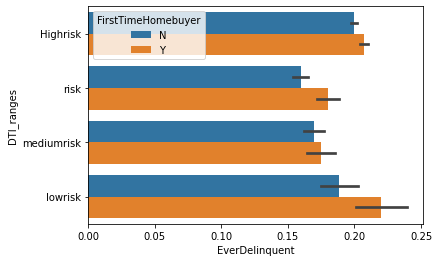

In [771]:
sns.barplot(loan_export2["EverDelinquent"],loan_export2["DTI_ranges"],hue=loan_export2["FirstTimeHomebuyer"])

Dtirange
highrisk-whether a person is buying a first home or not there is a high chance of deliquency
risk-person who is buying home for first time is deliqueating more
medium risk-mostly same
low risk-chances of deliquency for a first time home buyer is more
#chances of deliquency is more for a person buying home for first iem in all categories


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


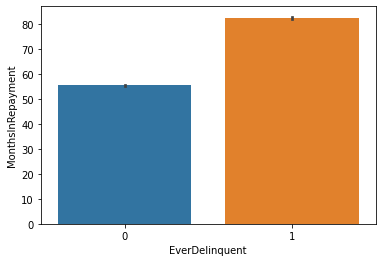

In [772]:
sns.barplot(loan_export2["EverDelinquent"],loan_export2["MonthsInRepayment"])

people who are delaying are late by 30 months in their monthly  payments.While the ones with no deliquency are having an average repayment of 50 months

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


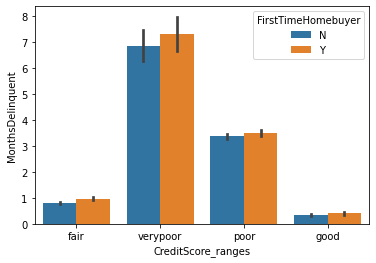

In [773]:
sns.barplot(loan_export2["CreditScore_ranges"],loan_export2["MonthsDelinquent"],hue=loan_export2["FirstTimeHomebuyer"])

creditscoresranges depicts us that the customers with less credit score are the most deliquent customers and if they are buying for first time their chances of deliquency is more 


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


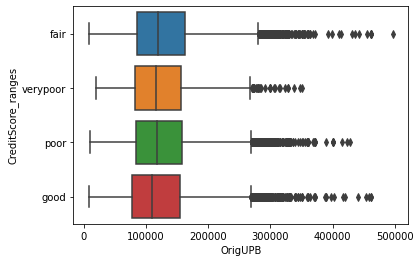

In [774]:
sns.boxplot(loan_export2["OrigUPB"],loan_export2["CreditScore_ranges"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


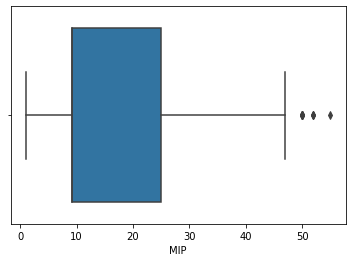

In [775]:
sns.boxplot(loan_export2["MIP"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


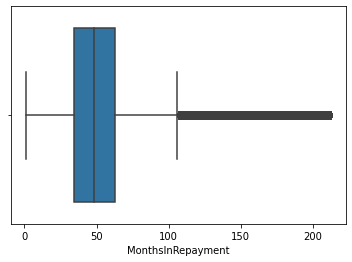

In [776]:
sns.boxplot(loan_export["MonthsInRepayment"])

outliers are present in orginal unpaid balance,MIP,months in repayment so we have to remove them.


In [777]:
def remove_outlier(col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  LOWER_RANGE=Q1-(1.5*IQR)
  UPPER_RANGE=Q3+(1.5*IQR)
  return LOWER_RANGE,UPPER_RANGE

In [778]:
LOWERITEMVISIBILITY,UPPERITEMVISIBILITY = remove_outlier(loan_export2["MonthsInRepayment"])
loan_export2["MonthsInRepayment"] = np.where(loan_export2["MonthsInRepayment"]>UPPERITEMVISIBILITY,UPPERITEMVISIBILITY,loan_export2["MonthsInRepayment"])
loan_export2["MonthsInRepayment"] = np.where(loan_export2["MonthsInRepayment"]<LOWERITEMVISIBILITY,LOWERITEMVISIBILITY,loan_export2["MonthsInRepayment"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


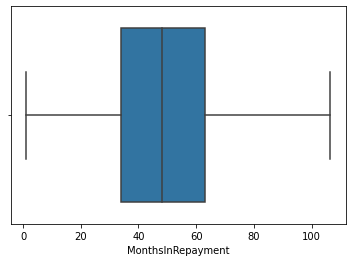

In [779]:
#check
sns.boxplot(loan_export2["MonthsInRepayment"])

In [780]:
LOWERITEMVISIBILITY,UPPERITEMVISIBILITY = remove_outlier(loan_export2["MIP"])
loan_export2["MIP"] = np.where(loan_export2["MIP"]>UPPERITEMVISIBILITY,UPPERITEMVISIBILITY,loan_export2["MIP"])
loan_export2["MIP"] = np.where(loan_export2["MIP"]<LOWERITEMVISIBILITY,LOWERITEMVISIBILITY,loan_export2["MIP"])

In [781]:
LOWERITEMVISIBILITY,UPPERITEMVISIBILITY = remove_outlier(loan_export2["OrigUPB"])
loan_export2["OrigUPB"] = np.where(loan_export2["OrigUPB"]>UPPERITEMVISIBILITY,UPPERITEMVISIBILITY,loan_export2["OrigUPB"])
loan_export2["OrigUPB"] = np.where(loan_export2["OrigUPB"]<LOWERITEMVISIBILITY,LOWERITEMVISIBILITY,loan_export2["OrigUPB"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


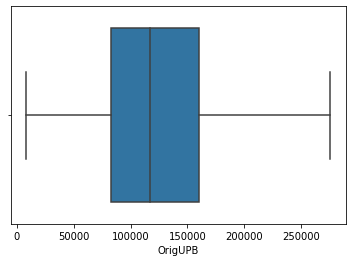

In [782]:
sns.boxplot(loan_export2["OrigUPB"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


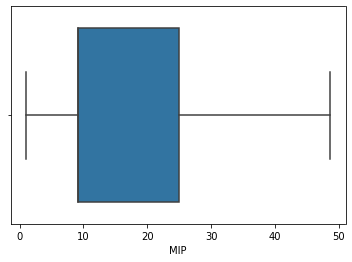

In [783]:
sns.boxplot(loan_export2["MIP"])

In [784]:
loan_export2.isnull().sum()

FirstTimeHomebuyer    0
MIP                   0
Units                 0
Occupancy             0
OrigUPB               0
OrigInterestRate      0
PPM                   0
LoanPurpose           0
OrigLoanTerm          0
NumBorrowers          0
EverDelinquent        0
MonthsDelinquent      0
MonthsInRepayment     0
CreditScore_ranges    0
ltv_ranges            0
DTI_ranges            0
dtype: int64

In [785]:
loan_export2.count()


FirstTimeHomebuyer    291451
MIP                   291451
Units                 291451
Occupancy             291451
OrigUPB               291451
OrigInterestRate      291451
PPM                   291451
LoanPurpose           291451
OrigLoanTerm          291451
NumBorrowers          291451
EverDelinquent        291451
MonthsDelinquent      291451
MonthsInRepayment     291451
CreditScore_ranges    291451
ltv_ranges            291451
DTI_ranges            291451
dtype: int64

In [786]:
#encoding categorical into numerical variables


In [787]:
loan_export2.dtypes

FirstTimeHomebuyer     object
MIP                   float64
Units                   int64
Occupancy              object
OrigUPB               float64
OrigInterestRate      float64
PPM                    object
LoanPurpose            object
OrigLoanTerm            int64
NumBorrowers           object
EverDelinquent          int64
MonthsDelinquent        int64
MonthsInRepayment     float64
CreditScore_ranges     object
ltv_ranges             object
DTI_ranges             object
dtype: object

In [788]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
var_mod = ['CreditScore_ranges','ltv_ranges','NumBorrowers','DTI_ranges','LoanPurpose','PPM','Occupancy','FirstTimeHomebuyer']
le = LabelEncoder()
for i in var_mod:
    loan_export2[i] = le.fit_transform(loan_export2[i])

In [789]:
#One Hot Coding:
loan_export2 = pd.get_dummies(loan_export2, columns=['CreditScore_ranges','ltv_ranges','NumBorrowers','DTI_ranges','LoanPurpose','PPM','Occupancy','FirstTimeHomebuyer'])

In [790]:
loan_export2.dtypes

MIP                     float64
Units                     int64
OrigUPB                 float64
OrigInterestRate        float64
OrigLoanTerm              int64
EverDelinquent            int64
MonthsDelinquent          int64
MonthsInRepayment       float64
CreditScore_ranges_0      uint8
CreditScore_ranges_1      uint8
CreditScore_ranges_2      uint8
CreditScore_ranges_3      uint8
ltv_ranges_0              uint8
ltv_ranges_1              uint8
NumBorrowers_0            uint8
NumBorrowers_1            uint8
NumBorrowers_2            uint8
DTI_ranges_0              uint8
DTI_ranges_1              uint8
DTI_ranges_2              uint8
DTI_ranges_3              uint8
LoanPurpose_0             uint8
LoanPurpose_1             uint8
LoanPurpose_2             uint8
PPM_0                     uint8
PPM_1                     uint8
PPM_2                     uint8
Occupancy_0               uint8
Occupancy_1               uint8
Occupancy_2               uint8
FirstTimeHomebuyer_0      uint8
FirstTim

In [793]:
#Normalizing and Scaling( Numerical Variables)
from sklearn.preprocessing import StandardScaler
std_scale=StandardScaler()
std_scale

StandardScaler()

In [ ]:
#MIP                     float64
Units                     int64
OrigUPB                 float64
OrigInterestRate        float64
OrigLoanTerm              int64
EverDelinquent            int64
MonthsDelinquent          int64
MonthsInRepayment 

In [798]:
loan_export2["Units"]=std_scale.fit_transform(loan_export2[["Units"]])

In [800]:
loan_export2["MIP"]=std_scale.fit_transform(loan_export2[["MIP"]])
loan_export2["OrigUPB"]=std_scale.fit_transform(loan_export2[["OrigUPB"]])
loan_export2["OrigInterestRate"]=std_scale.fit_transform(loan_export2[["OrigInterestRate"]])
loan_export2["OrigLoanTerm"]=std_scale.fit_transform(loan_export2[["OrigLoanTerm"]])
loan_export2["EverDelinquent"]=std_scale.fit_transform(loan_export2[["EverDelinquent"]])
loan_export2["MonthsDelinquent"]=std_scale.fit_transform(loan_export2[["MonthsDelinquent"]])
loan_export2["MonthsInRepayment"]=std_scale.fit_transform(loan_export2[["MonthsInRepayment"]])

In [807]:
import matplotlib.pyplot as plt

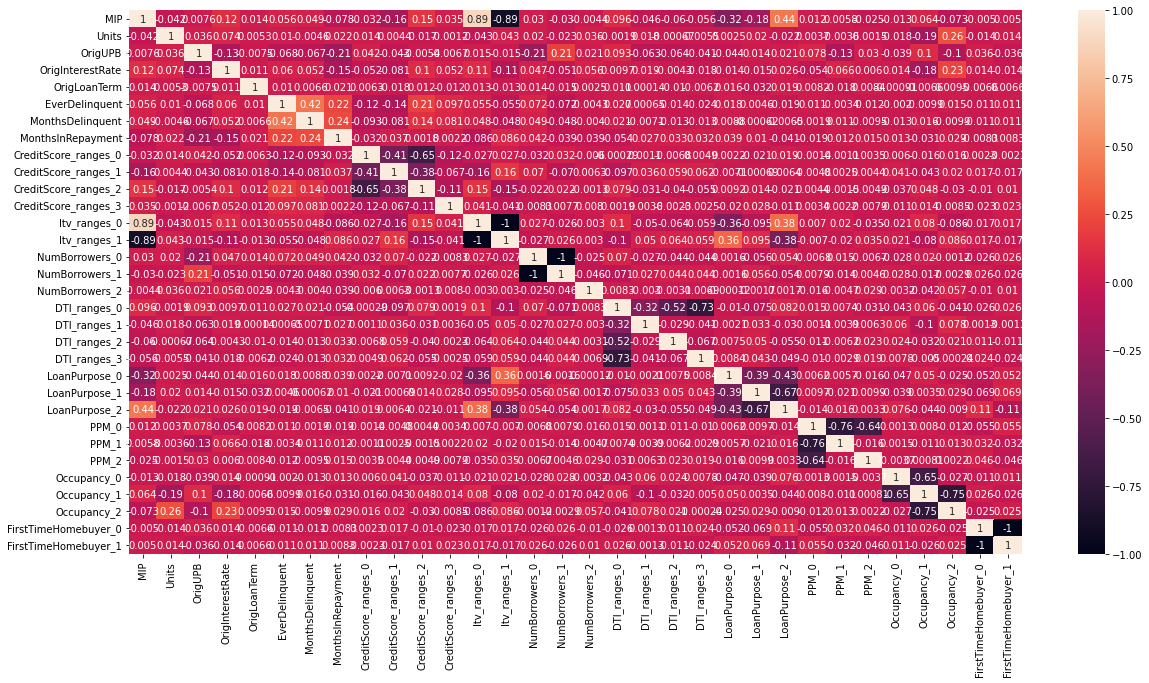

In [808]:
plt.figure(figsize=(20,10))
sns.heatmap(loan_export2.corr(),annot=True)